In [2]:
import data_preprocessing as dp
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = dp.prepare_data()

In [25]:
data

,station_id,longitude,latitude,time,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,RelativeHumidity,QC_Flag
1136,M1,-11.200000,53.126600,2001-03-30 15:00:00+00:00,1005.800,210.0,7.000,70.000,1.700,7.000,10.000,9.200,90.000,True
1137,M1,-11.200000,53.126600,2001-03-30 16:00:00+00:00,1005.400,200.0,7.980,11.700,1.600,7.000,10.000,9.200,92.200,True
1138,M1,-11.200000,53.126600,2001-03-30 17:00:00+00:00,1004.400,190.0,9.920,13.600,1.800,7.000,9.900,9.300,93.500,True
1139,M1,-11.200000,53.126600,2001-03-30 18:00:00+00:00,1003.400,180.0,11.090,15.600,1.600,6.000,9.700,9.300,94.100,True
1140,M1,-11.200000,53.126600,2001-03-30 19:00:00+00:00,1002.400,180.0,14.010,19.500,1.600,6.000,9.300,9.300,95.400,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794791,M2,-5.430200,53.483600,2022-11-07 13:00:00+00:00,991.174,179.0,26.868,35.407,2.656,5.859,14.951,14.745,84.766,False
794792,M6,-15.881350,53.074820,2022-11-07 13:00:00+00:00,976.978,239.0,10.702,14.800,3.672,7.969,11.582,13.632,64.063,False
794793,M5,-6.704336,51.690425,2022-11-07 13:00:00+00:00,992.224,183.0,26.071,39.961,3.672,6.797,14.902,13.839,81.543,False
794794,M4,-9.999136,54.999967,2022-11-07 13:00:00+00:00,979.919,139.0,20.948,31.991,3.906,7.500,12.803,13.217,94.434,False


# Calculate statistics for the data to get a feeling for the data

In [40]:
stations = ["M1", "M2", "M3", "M4"]
station_df = [data[data.station_id == sid] for sid in stations]
means_df = pd.DataFrame({f"Means {sid}": data[data.station_id == sid].mean() for sid in stations})
std_df = pd.DataFrame({f"Means {sid}": data[data.station_id == sid].std() for sid in stations})
max_df = pd.DataFrame({f"Means {sid}": data[data.station_id == sid].max() for sid in stations})
min_df = pd.DataFrame({f"Means {sid}": data[data.station_id == sid].min() for sid in stations})

/tmp/ipykernel_211484/4008566182.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  means_df = pd.DataFrame({f"Means {sid}": data[data.station_id == sid].mean() for sid in stations})
/tmp/ipykernel_211484/4008566182.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means_df = pd.DataFrame({f"Means {sid}": data[data.station_id == sid].mean() for sid in stations})
/tmp/ipykernel_211484/4008566182.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence 

In [41]:
means_df

,Means M1,Means M2,Means M3,Means M4
longitude,-11.200000,-5.430200,-10.548261,-9.999136
latitude,53.126600,53.483600,51.215956,54.999967
AtmosphericPressure,1014.304295,1013.647740,1014.980525,1011.915785
WindDirection,208.062782,199.532116,211.934432,202.326119
WindSpeed,15.023754,14.110224,15.437375,15.917345
Gust,22.207844,19.103960,21.668864,21.858872
WaveHeight,2.881052,1.186452,2.922609,2.914358
WavePeriod,7.282571,4.358804,6.986433,6.755644
AirTemperature,11.946538,10.909081,12.070984,11.518590
SeaTemperature,12.797231,11.612914,12.912721,12.489065


In [42]:
# std for time is not interesting
std_df = std_df.drop("time")
std_df

,Means M1,Means M2,Means M3,Means M4
longitude,0.0,0.0,0.0,0.0
latitude,0.0,0.0,0.0,0.0
AtmosphericPressure,12.432045,12.200377,12.21033,13.049313
WindDirection,89.653543,89.642256,92.118046,92.266652
WindSpeed,7.067754,6.759299,6.685537,7.016967
Gust,9.854693,9.154604,9.174607,9.463893
WaveHeight,1.548039,0.747202,1.599517,1.621029
WavePeriod,1.609883,0.856493,1.534397,1.484569
AirTemperature,2.616048,3.055308,2.795054,2.678904
SeaTemperature,2.101852,2.407141,2.221873,1.899475


In [43]:
max_df

,Means M1,Means M2,Means M3,Means M4
longitude,-11.2,-5.4302,-10.548261,-9.999136
latitude,53.1266,53.4836,51.215956,54.999967
time,2007-07-09 12:00:00+00:00,2022-11-07 13:00:00+00:00,2022-11-07 13:00:00+00:00,2022-11-07 13:00:00+00:00
AtmosphericPressure,1045.4,1047.925,1045.6,1042.065
WindDirection,360.0,360.0,360.0,360.0
WindSpeed,51.0,49.0,50.093,57.0
Gust,189.0,200.0,181.0,76.0
WaveHeight,13.4,6.641,14.063,15.781
WavePeriod,18.0,9.0,14.414,16.0
AirTemperature,19.1,22.822,20.957,20.225


In [44]:
min_df

,Means M1,Means M2,Means M3,Means M4
longitude,-11.2,-5.4302,-10.548261,-9.999136
latitude,53.1266,53.4836,51.215956,54.999967
time,2001-03-30 15:00:00+00:00,2001-05-03 14:00:00+00:00,2002-09-19 09:00:00+00:00,2007-05-03 15:00:00+00:00
AtmosphericPressure,967.4,956.2,955.2,914.2
WindDirection,10.0,0.0,0.0,0.0
WindSpeed,0.0,0.0,0.0,0.228
Gust,2.0,0.0,0.0,1.935
WaveHeight,0.5,0.0,0.469,0.391
WavePeriod,2.0,0.0,3.281,3.281
AirTemperature,3.0,1.1,2.4,1.719


# Observations
- We see in the std and mean values of the gps position, that the buoys are moving around a little bit
- Besides that the data seems to be behaving normally without outrages min / max values and reasonable means and std deviation

# VIsualize if Variables of a Station are correlated

In [45]:
import seaborn as sns

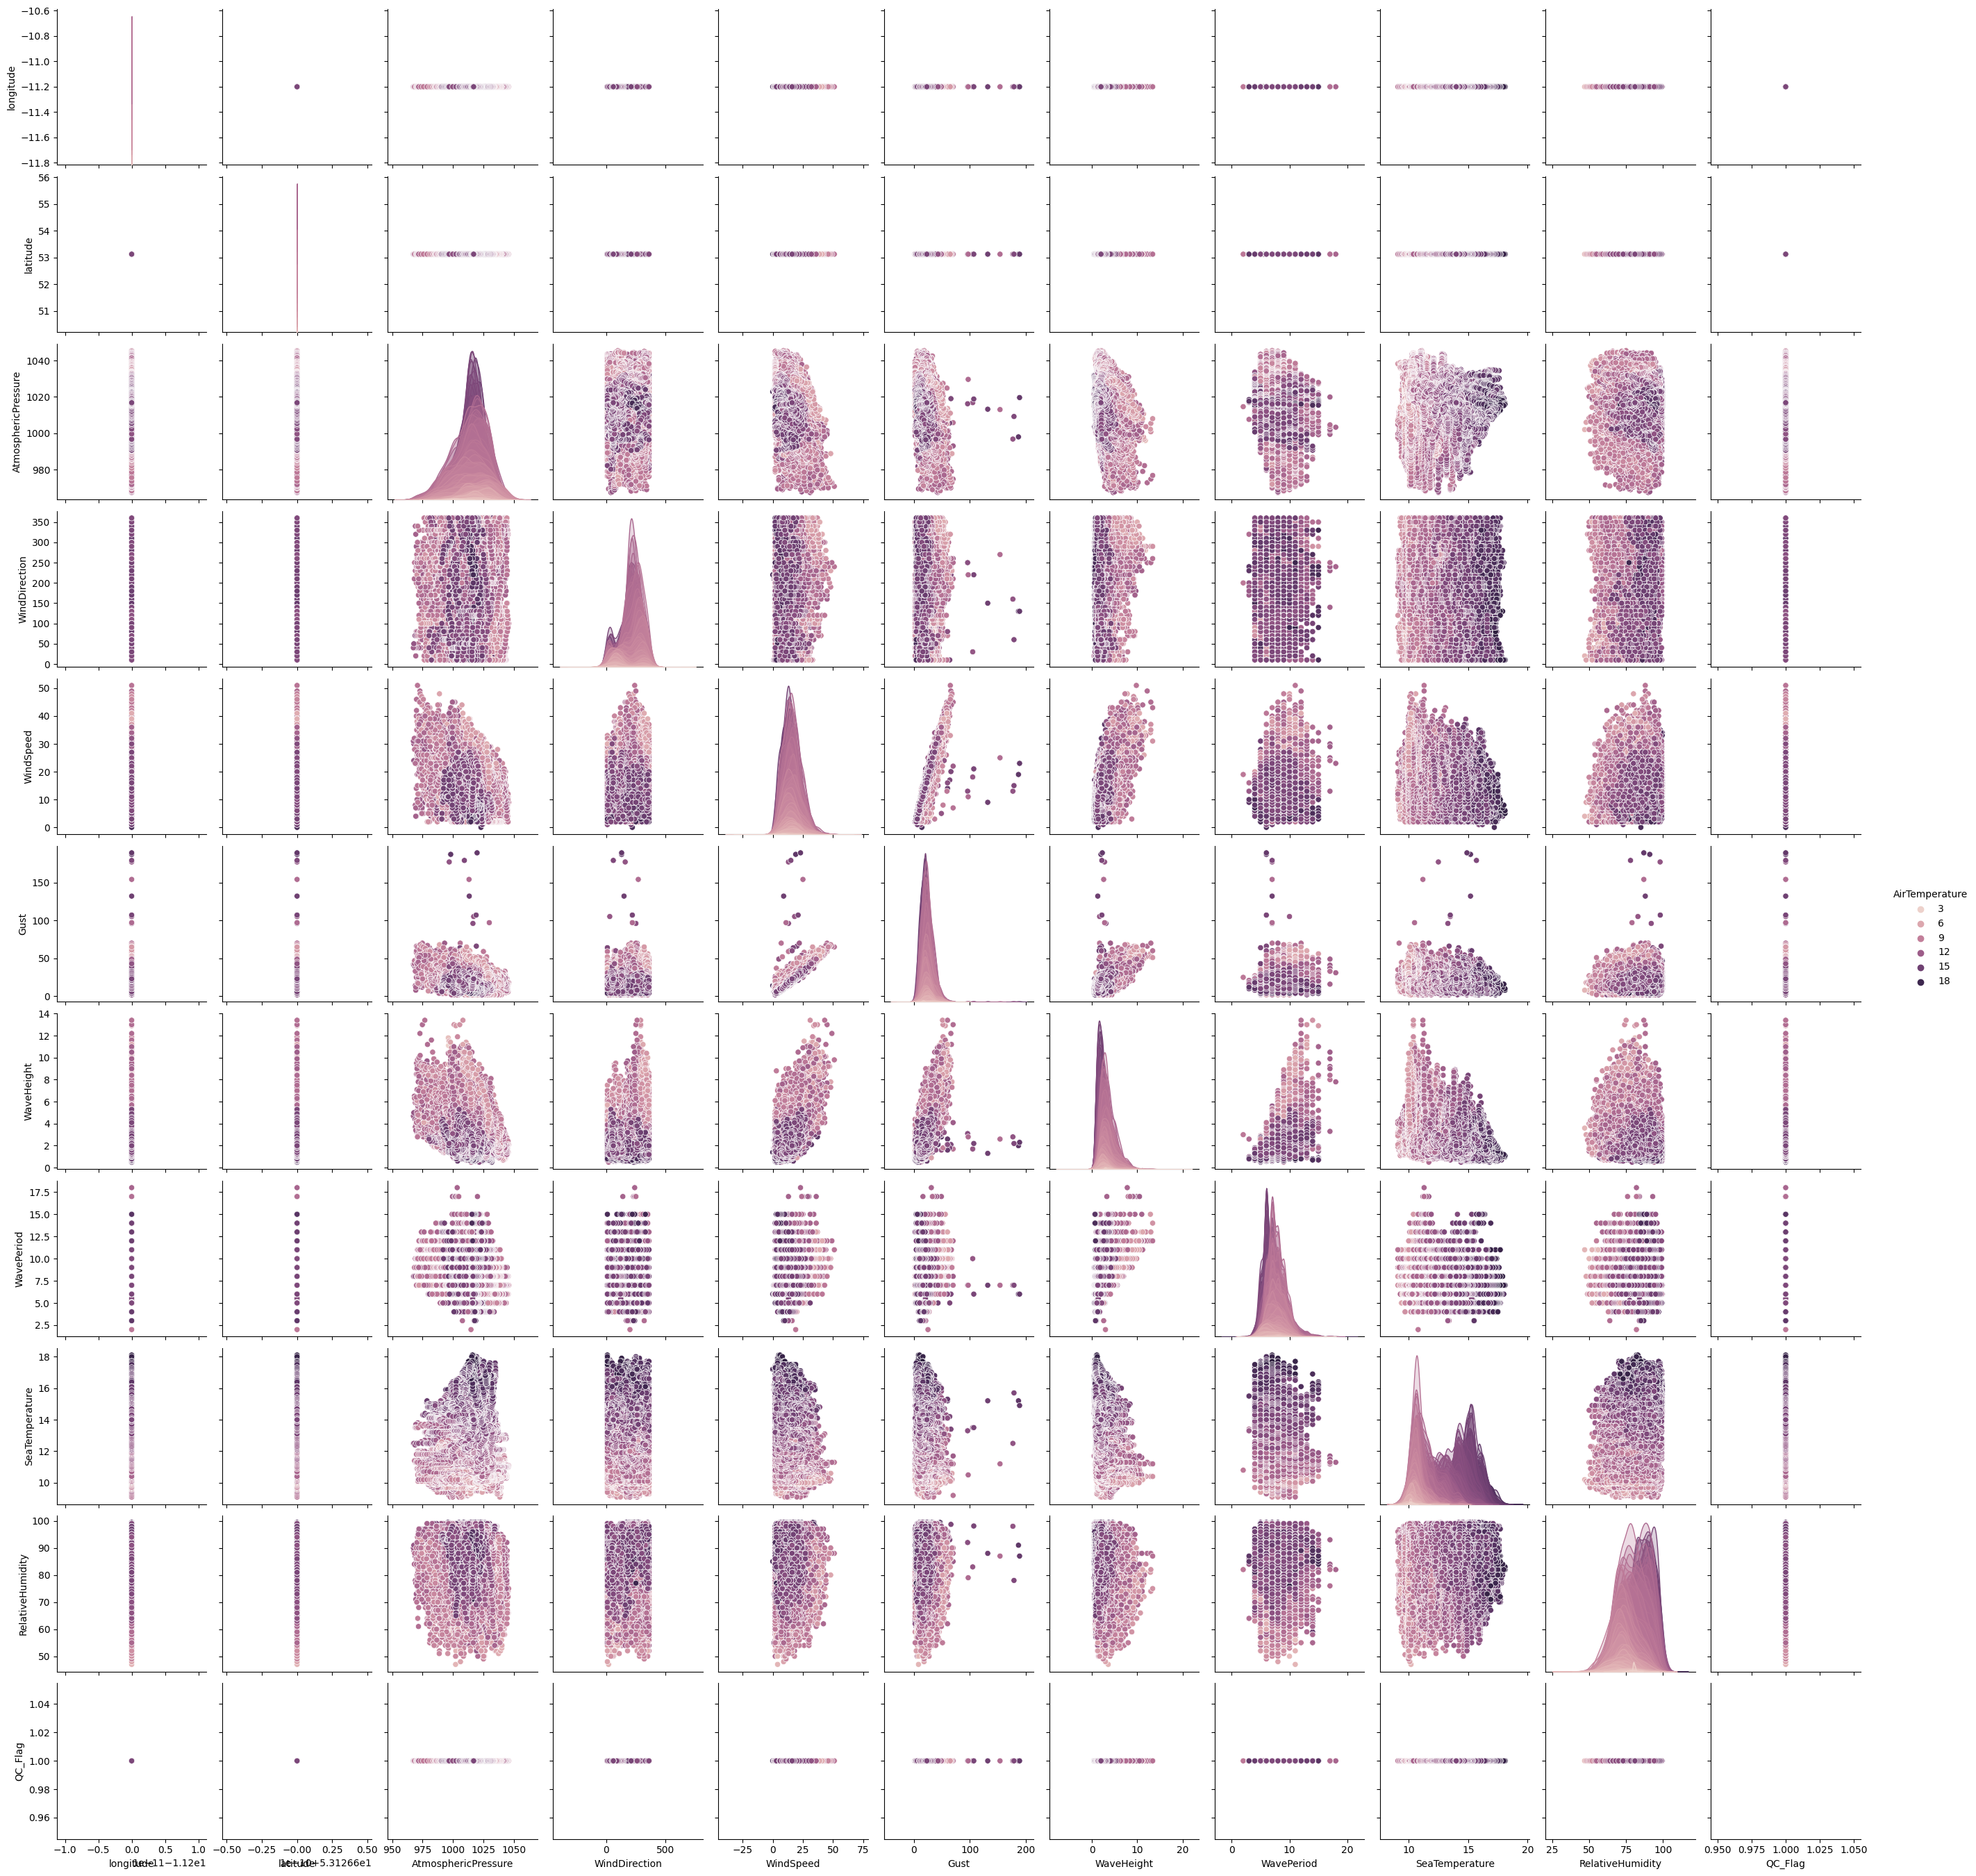

In [46]:
sns.pairplot(data=station_df[0], hue="AirTemperature")